In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/My Drive/Colab_Notebooks/hyperpectral_imaging")

# Data preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("spectral_data.csv")
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [ ]:
print(f"Number of samples(rows): {df.shape[0]}\n Number of columns: {df.shape[1]}")

Number of samples(rows): 500
 Number of columns: 450


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


In [ ]:
df.vomitoxin_ppb.describe()

,vomitoxin_ppb
count,500.000000
mean,3410.006000
std,13095.803483
min,0.000000
25%,137.500000
50%,500.000000
75%,1700.000000
max,131000.000000


According to above stats and with help of internet assuming its for raw corn and permissible limit would be 2000

In [ ]:
# drop sample id column
df1 = df.drop('hsi_id', axis=1)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,0.361567,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,0.359674,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,0.323854,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,0.413106,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,0.430482,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


## Missing values

In [ ]:
missing_val = df.isnull().sum()
print(missing_val[missing_val > 0])

Series([], dtype: int64)


In [ ]:
if df.isnull().sum().sum() ==0 :
  print("No missing values")
else:
  print("Missing values")

No missing values


In [195]:
toxic_df = df[df['vomitoxin_ppb'] > 2000]
len(toxic_df)

118

## Outliers in data

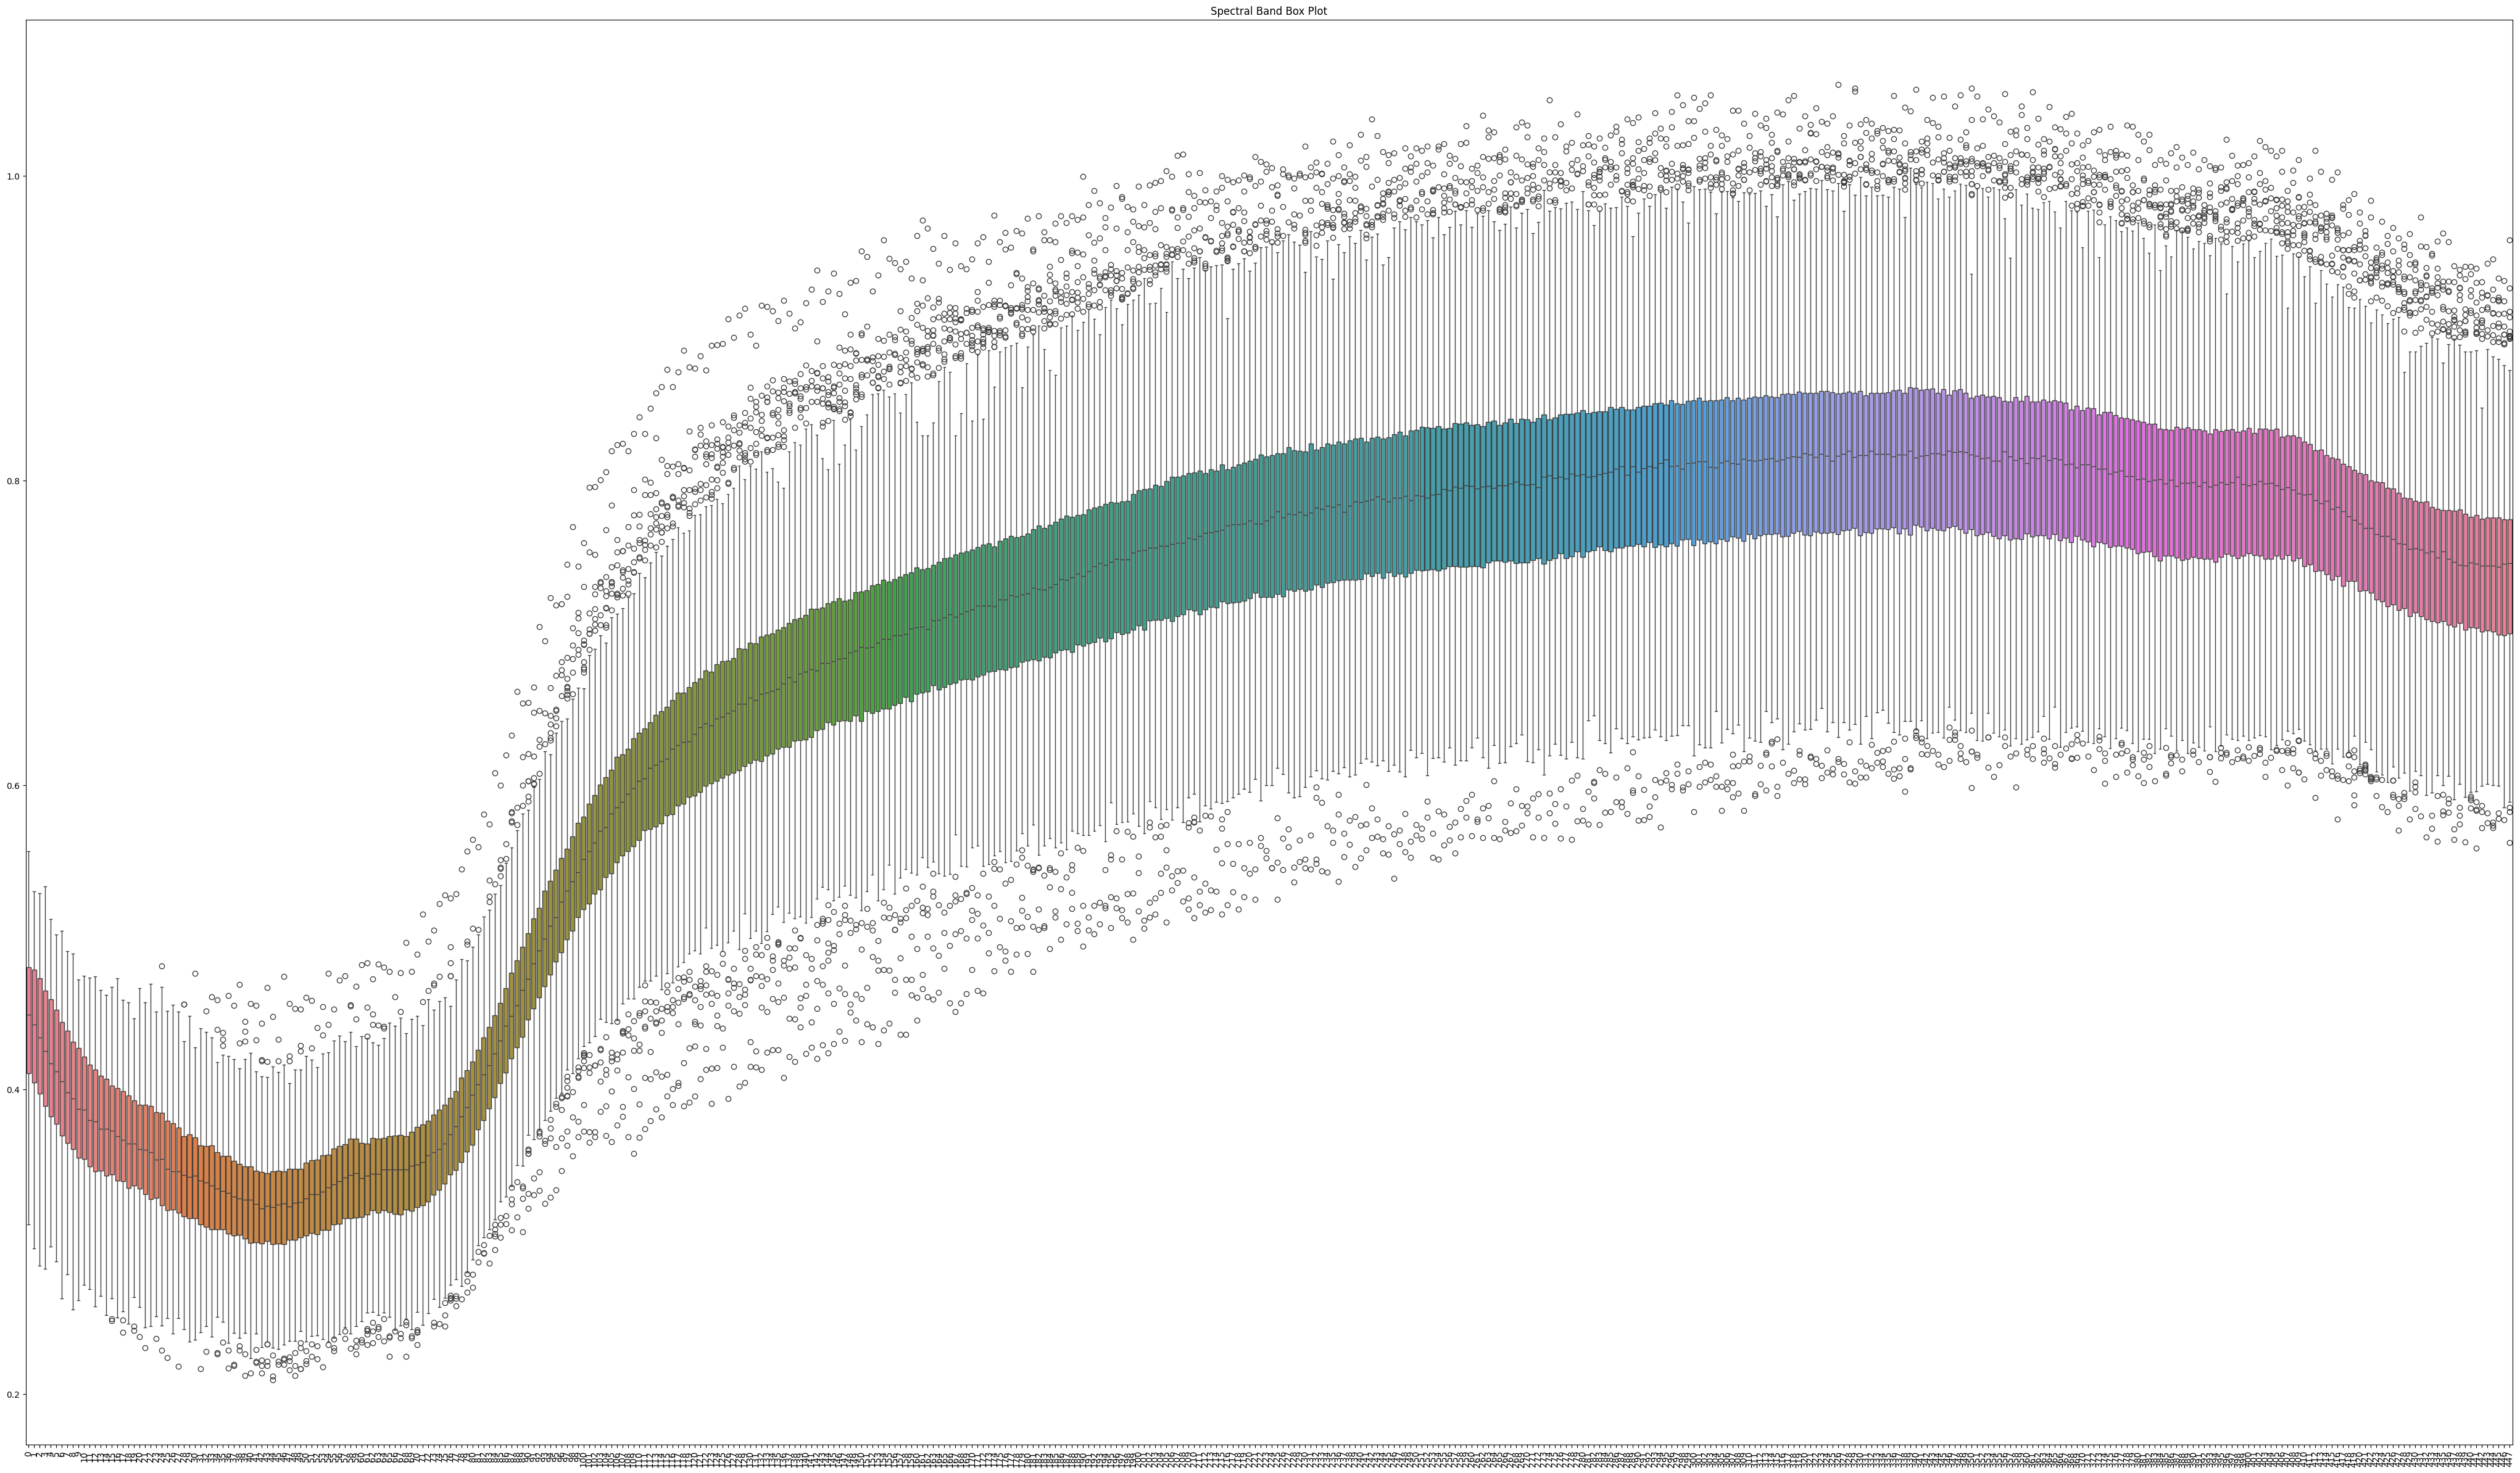

In [ ]:
# box plot
plt.figure(figsize=(52, 30))
sns.boxplot(data=df1.drop('vomitoxin_ppb', axis=1))
plt.title("Spectral Band Box Plot")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

# Detect outliers (values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR)
outliers = ((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR)))

# Count outliers per column
outlier_counts = outliers.sum()
n = outlier_counts[outlier_counts > 0]
print(outlier_counts[outlier_counts > 0]) # Show columns with outliers

15                2
17                2
19                2
20                1
21                1
                 ..
444              11
445              11
446              10
447              13
vomitoxin_ppb    80
Length: 429, dtype: int64


In [ ]:
df1.head(1)

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,0.416181,0.396844,0.408985,0.372865,0.385293,0.36539,0.355226,0.34335,0.344837,0.361567,...,0.71028,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.70452,1100.0


### caping outlier

In [ ]:
# define upper and lower limit for capping
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

df2 = df1.copy()
df2.drop(columns=['vomitoxin_ppb'], inplace=True)
df2[df2.columns] = np.clip(df2, lower_bound, upper_bound, axis=1)
df2.head(2)

,0,1,2,3,4,5,6,7,8,9,...,438,439,440,441,442,443,444,445,446,447
0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,0.361567,...,0.680883,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520
1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,0.359674,...,0.701600,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054


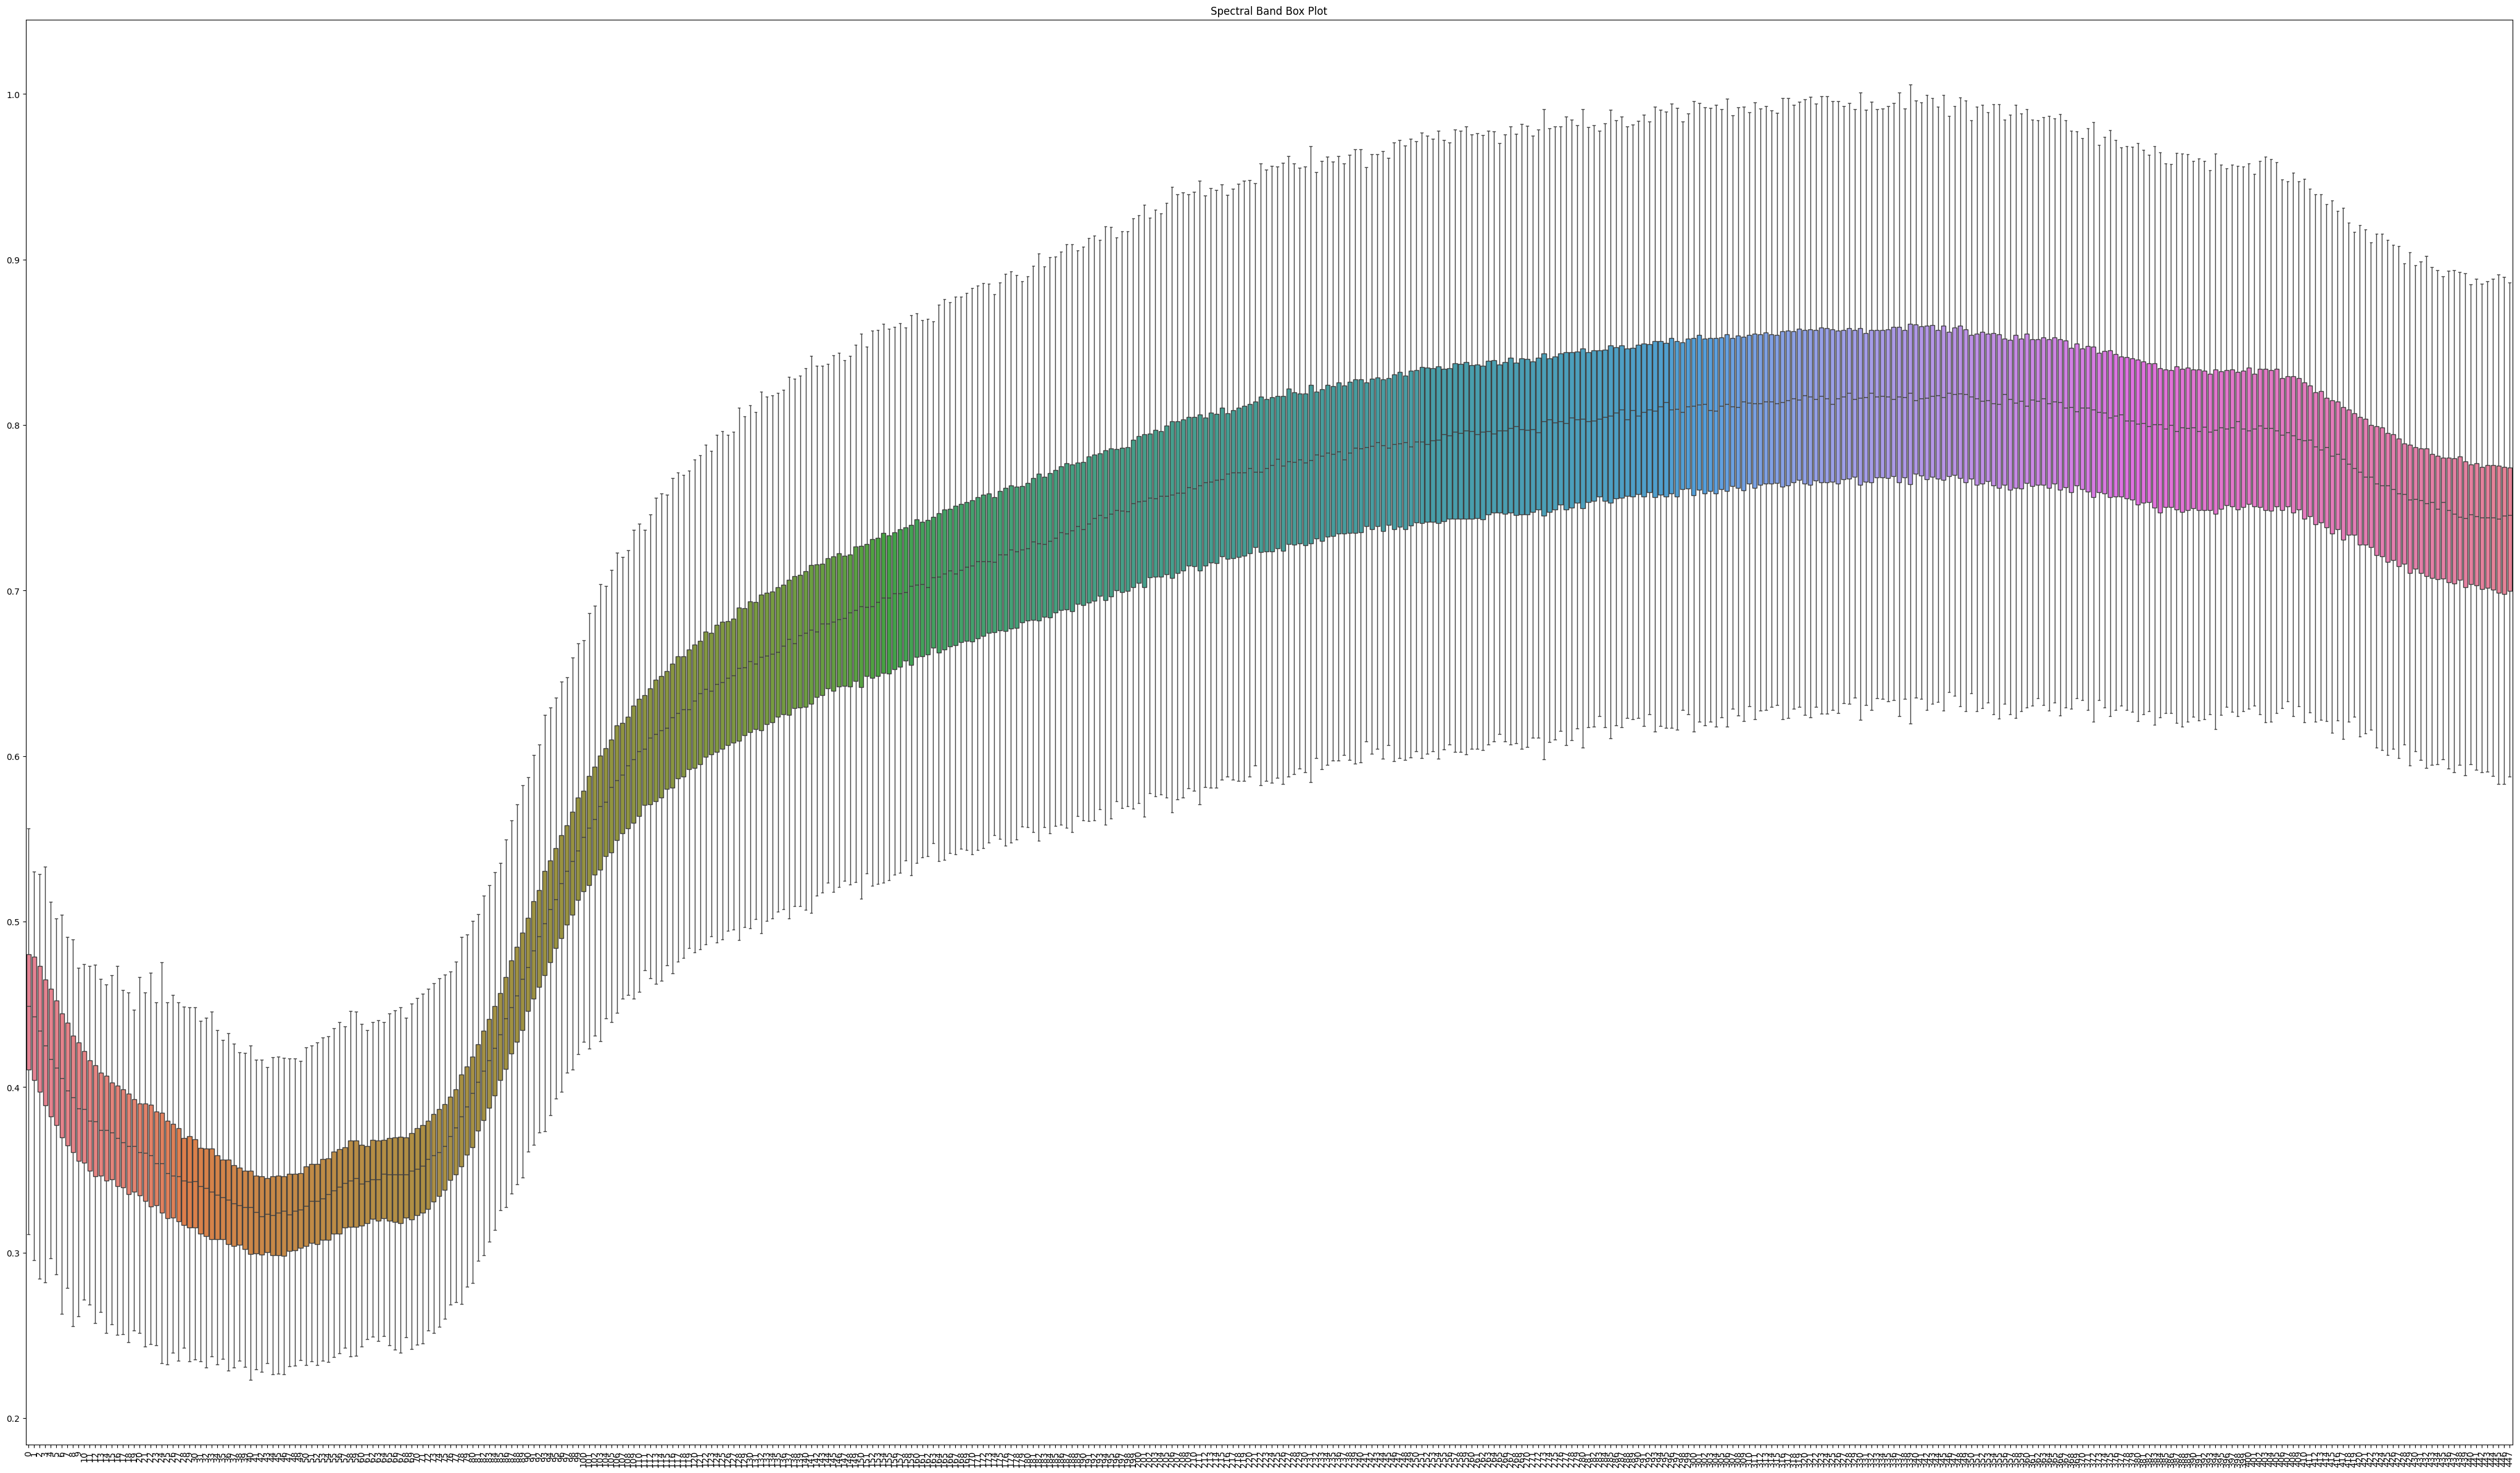

In [ ]:
# box plot
plt.figure(figsize=(52, 30))
sns.boxplot(data=df2)
plt.title("Spectral Band Box Plot")
plt.xticks(rotation=90)
plt.show()

In [ ]:
y = df['vomitoxin_ppb']
X = df2
print(f"X shape: {X.shape}\nY shape: {y.shape}")

X shape: (500, 448)
Y shape: (500,)


In [ ]:
X = X.to_numpy()
Y = y.to_numpy()

## Normalizing data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
import pickle
with open('x_scaler.pkl', 'wb') as file:
  pickle.dump(scaler,file)

# Exploring data

## average reflectance value curve of bands

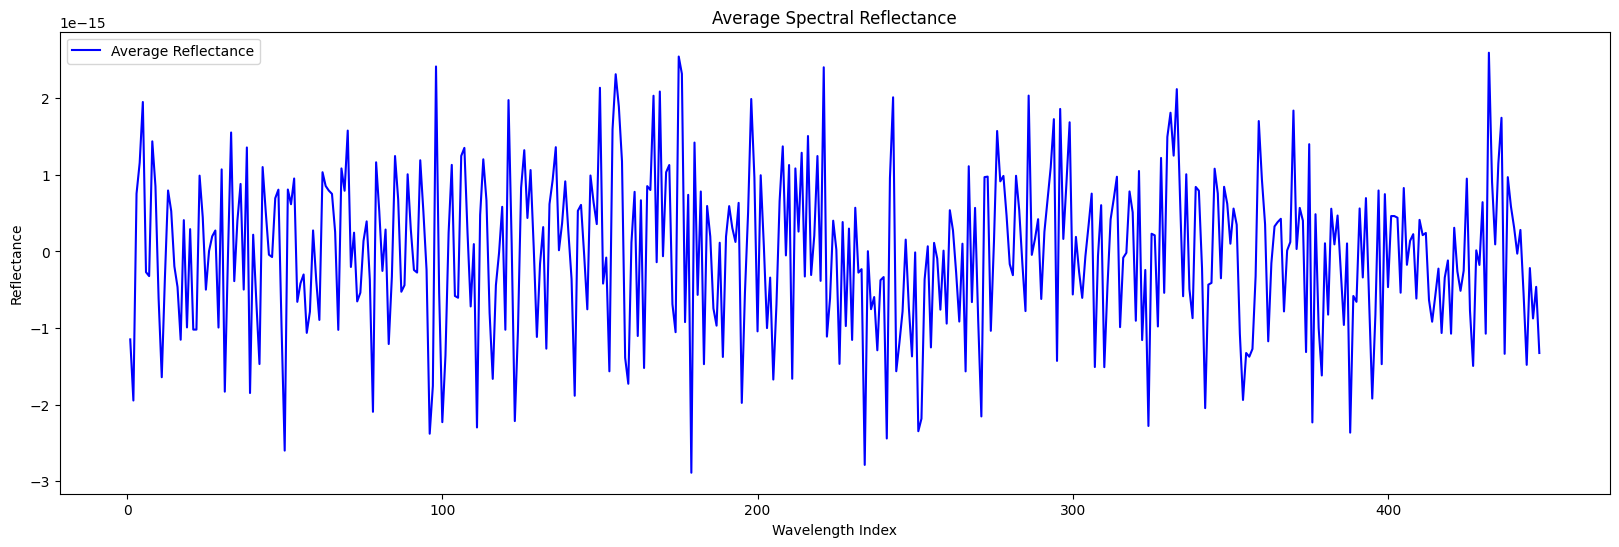

In [ ]:
# Plot the average reflectance curve

mean_reflectance = np.mean(X, axis=0)

plt.figure(figsize=(20, 6))
plt.plot(range(1, 449), mean_reflectance, label="Average Reflectance", color='b')
plt.xlabel("Wavelength Index")
plt.ylabel("Reflectance")
plt.title("Average Spectral Reflectance")
plt.legend()
plt.show()


In [ ]:
data = np.column_stack((X, y))
len(data[0])

449

In [ ]:
X = pd.DataFrame(X)

## Correlation between band reflectance and target
(highly corelated bands can be selected as important features)


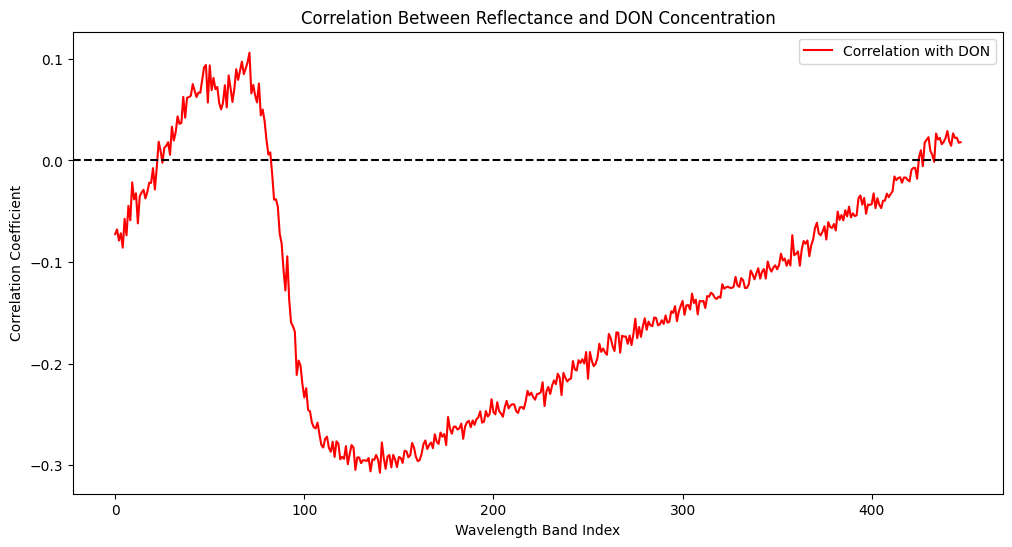

In [ ]:
# Compute correlation between reflectance values at each band and DON concentration
correlations = X.corrwith(y)

# Plot correlation values
plt.figure(figsize=(12, 6))
plt.plot(range(448), correlations, color='r', label="Correlation with DON")
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Wavelength Band Index")
plt.ylabel("Correlation Coefficient")
plt.title("Correlation Between Reflectance and DON Concentration")
plt.legend()
plt.show()

# PCA - Dimensionality reduction

In [ ]:
# pca
from sklearn.decomposition import PCA

pca1 = PCA(n_components=100)

X_pca1 = pca1.fit_transform(X)

In [ ]:
explained_variance = pca1.explained_variance_ratio_

## explained variance and cumulative variance by components

Text(0, 0.5, 'explained variance')

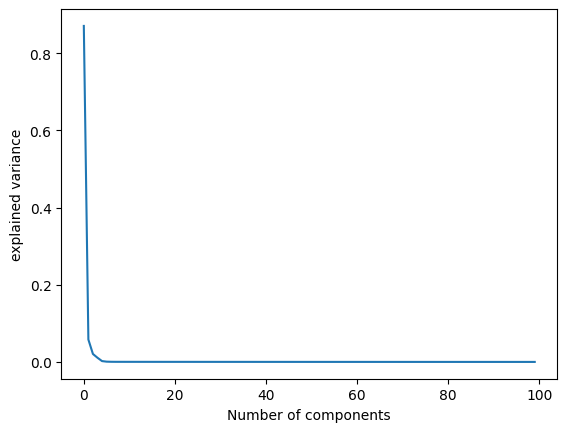

In [198]:
plt.plot(pca1.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('explained variance')

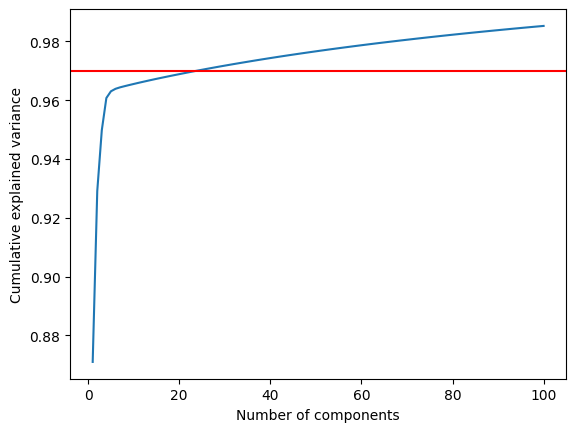

In [ ]:

explained_cum_variance = np.cumsum(explained_variance)
plt.plot(np.arange(1,len(explained_cum_variance)+1), explained_cum_variance)
plt.axhline(y=0.97, color='r')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [ ]:
X_pca1.shape

(500, 100)

In [ ]:
# choosing number of principal components based keeping 97% of information
num_components = np.argmax(explained_cum_variance >= 0.97) + 1
print(f"Number of components to retain 97% variance: {num_components}")

Number of components to retain 97% variance: 24


In [ ]:
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X)

print(f"Original shape: {X.shape}")
print(f"Reduced shape: {X_pca.shape}")

Original shape: (500, 448)
Reduced shape: (500, 24)


In [ ]:
with open("pca.pkl", "wb") as f:
    pickle.dump(pca, f)

## Scatter plot of Principal components

almost all type of examples covered by pc as shown by plots

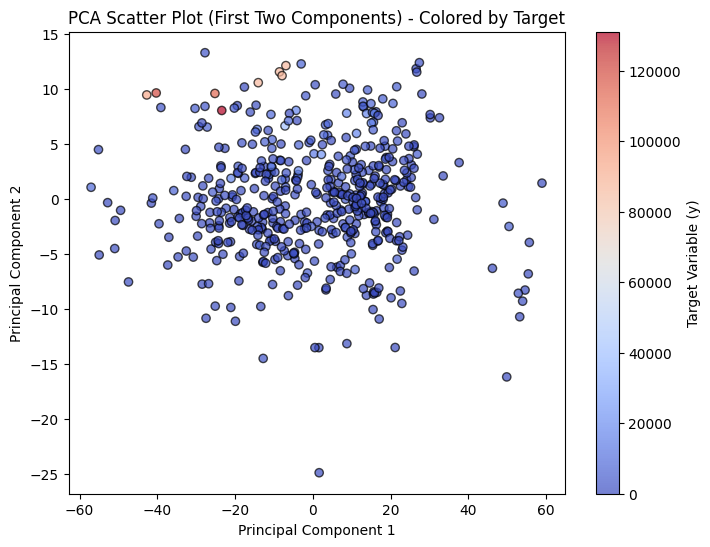

In [197]:
plt.figure(figsize=(8, 6))
sc = plt.scatter(X_pca1[:, 0], X_pca1[:, 1], c=y, cmap="coolwarm", alpha=0.7, edgecolors="k")
plt.colorbar(sc, label="Target Variable (y)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot (First Two Components) - Colored by Target")
plt.show()

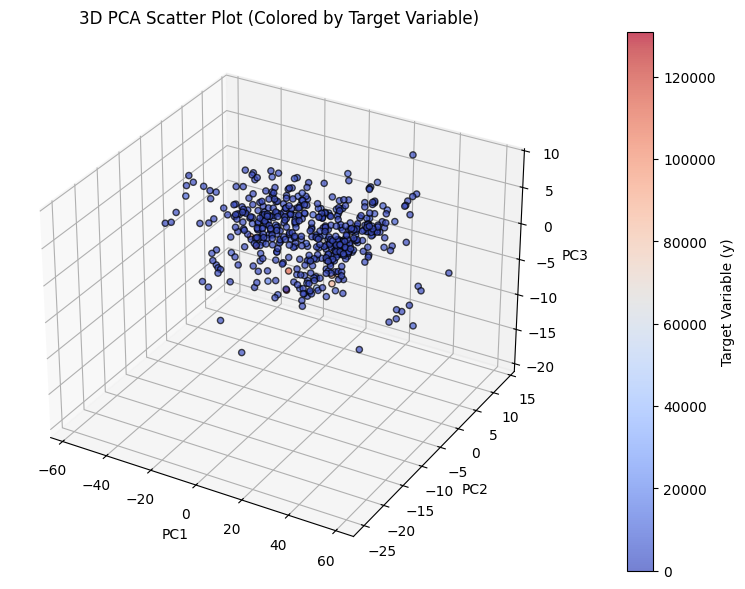

In [199]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color mapped to target variable
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                c=y, cmap="coolwarm", alpha=0.7, edgecolors="k")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA Scatter Plot (Colored by Target Variable)")

cbar = fig.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label("Target Variable (y)")

plt.show()

# Saving cleaned data

In [ ]:
y.shape

(500,)

In [ ]:
X_pca.shape

(500, 24)

In [ ]:
cleaned_data = pd.DataFrame(np.column_stack((X_pca, y)))

In [ ]:
cleaned_data.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-14.772581,2.342543,1.919881,-2.249112,0.411723,0.041539,-0.460657,0.209634,0.453997,-0.251667,...,-0.098442,0.317228,-0.215982,-0.418552,0.353760,0.021607,-0.464635,-0.202493,-0.456604,1100.0
1,-14.677256,2.417671,0.756554,-0.902971,-0.309748,-0.358358,0.245970,0.093998,0.921233,0.451197,...,0.275897,0.086044,0.679698,-0.246618,-0.495865,-0.295086,0.529692,0.142566,-0.093423,1000.0
2,-30.744980,-5.259979,-4.912312,1.465196,-1.637107,0.166214,-0.412836,-0.249687,0.157248,0.114802,...,-0.551535,-0.625487,0.172465,-0.296510,0.087648,-0.215938,0.458923,-0.273609,0.356186,1300.0
3,4.665073,1.785030,2.538628,1.469829,0.667947,0.599540,0.175874,-0.424000,0.031279,-0.482766,...,-0.166383,0.399463,0.554659,0.079471,-0.729707,-0.035164,0.673359,0.263525,-0.407846,1300.0
4,13.185562,-1.388884,-1.192601,2.977978,-0.642351,0.134925,-0.024630,0.275485,-0.209019,-0.273809,...,0.655098,0.188484,0.145447,0.601256,0.139294,-0.315473,-0.034044,-0.499088,0.377771,220.0


In [ ]:
cleaned_data.to_csv('cleaned_data.csv', index=False)